# Case Study: Analysing Olympic Medals Dataset 1896-2012


## 1. Grouping and aggregating
The Olympic medal data for the following exercises comes from [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data). It comprises records of all events held at the Olympic games between 1896 and 2012.

Suppose you have loaded the data into a DataFrame medals. You now want to find the total number of medals awarded to the USA per edition. To do this, filter the 'USA' rows and use the groupby() function to put the 'Edition' column on the index:

`USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')`

Given the goal of finding the total number of USA medals awarded per edition, what column should you select and which aggregation method should you use?

In [1]:
# Importing pandas
import pandas as pd

In [3]:
# Importing data
medals = pd.read_csv("data/all_medalists.csv")
medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [6]:
# Selecting NOC= USA and grouping by Edition
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

# Counting number of medals
USA_edition_grouped.Medal.count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

## 2. Using `.value_counts()` for ranking
For this exercise, you will use the pandas Series method `.value_counts()` to determine the top 15 countries ranked by total number of medals.

Notice that `.value_counts()` sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

In [11]:
# Select the 'NOC' column of medals: country_names
country_names = medals.NOC

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
medal_counts.head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

Well done! It looks like the top 5 countries here are USA, URS, GBR, FRA, and ITA.



## 3. Using `.pivot_table()` to count medals by type
Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In this exercise, you will use `.pivot_table()` first to aggregate the total medals by type. Then, you can use `.sum()` along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

In [18]:
# Construct the pivot table: counted
counted = medals.pivot_table(index = "NOC", values="Athlete", columns = "Medal", aggfunc="count")

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis = "columns")

# print counted
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [16]:
# Sort counted by the 'totals' column
counted = counted.sort_values("totals", ascending= False)

# Print the top 15 rows of counted
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


Fantastic work! Take a moment to look at the results and see if you find anything interesting!



## 4. Applying `.drop_duplicates()`
What could be the difference between the `'Event_gender'` and `'Gender'` columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (`Event_gender='M'`, `Gender='Women'`). However, you will see that, strangely enough, there is an observation with (`Event_gender='W'`, `Gender='Men'`).

The duplicates can be dropped using the `.drop_duplicates()` method, leaving behind the unique observations. 

In [33]:
# Select columns: ev_gen
ev_gen = medals[["Event_gender", "Gender"]]
ev_gen.tail()

,Event_gender,Gender
29211,M,Men
29212,M,Men
29213,M,Men
29214,M,Men
29215,M,Men


In [32]:
# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


Well done! You'll continue this exploration in the next two exercises.

## 5. Finding possible errors with `.groupby()`
You will now use `.groupby()` to continue your exploration. Your job is to group by `'Event_gender'` and `'Gender'` and count the rows.

You will see that there is only one suspicious row: This is likely a data error.

In [34]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(["Event_gender", "Gender"])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

Great work! You're close to identifying the suspicious data point.



## 6. Locating suspicious data
You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

In [35]:
# Create the Boolean Series: sus
sus = (medals.Gender == 'Men') & (medals.Event_gender == 'W')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


Fantastic! You have to always watch out for errors like this in your data.



## 7. Using .nunique() to rank by distinct sports
You may want to know which countries won medals in the most distinct sports. The `.nunique()` method is the principal aggregation here. Given a categorical Series `S`, `S.nunique()` returns the number of distinct categories.

In [38]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby("NOC")

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped.Sport.nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending = False )

# Print the top 15 rows of Nsports
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

Well done! Interestingly, the USSR is not in the top 5 in this category, while the USA continues to remain on top. What could be the cause of this? You'll compare the medal counts of USA vs. USSR more closely in the next two exercises to find out!



## 8. Counting USA vs. USSR Cold War Olympic Sports
The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrameare `'USA'` & `'URS'`.

In [41]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(["USA", "URS"])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[is_usa_urs & during_cold_war]

# Print cold_war_medals
cold_war_medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
19583,Seoul,1988,Wrestling,Wrestling Gre-R,"DJULFALAKIAN, Levon",URS,Men,62 - 68kg (lightweight),M,Gold
19587,Seoul,1988,Wrestling,Wrestling Gre-R,"TURLYKHANOV, Daulet",URS,Men,68 - 74kg (welterweight),M,Silver
19589,Seoul,1988,Wrestling,Wrestling Gre-R,"MAMIASHVILI, Mikhail",URS,Men,74 - 82kg (middleweight),M,Gold
19591,Seoul,1988,Wrestling,Wrestling Gre-R,"POPOV, Vladimir",URS,Men,82 - 90kg (light-heavyweight),M,Bronze
19594,Seoul,1988,Wrestling,Wrestling Gre-R,"KOSLOWSKI, Dennis Marvin",USA,Men,90 - 100kg (heavyweight),M,Bronze


In [42]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby("NOC")

# Create Nsports
Nsports = country_grouped.Sport.nunique().sort_values(ascending = False)

# Print Nsports
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

Great work! As you can see, the USSR is actually higher than the US when you look only at the Olympic competitions between 1952 and 1988!



## 9. Counting USA vs. USSR Cold War Olympic Medals
For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

- You'll need a pivot table with years (`'Edition'`) on the index and countries (`'NOC'`) on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a `NaN` in that entry of the pivot table.
- You'll need to slice the Cold War period and subset the `'USA'` and `'URS'` columns.
- You'll need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using `.idxmax(axis='columns')`. If `.max()` returns the maximum value of Series or 1D array, `.idxmax()` returns the index of the maximizing element. The argument `axis=columns` or `axis=1` is required because, by default, this aggregation would be done along columns for a DataFrame.

The final Series contains either `'USA'` or `'URS'` according to which country won the most medals in each Olympic edition. You can use `.value_counts()` to count the number of occurrences of each.

In [44]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index = "Edition", columns="NOC", values="Athlete", aggfunc="count")

# Print tail of medals_won_by_country
medals_won_by_country.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,2.0,NaN,2.0,NaN,57.0,6.0,NaN,1.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,3.0,NaN,20.0,2.0,132.0,3.0,1.0,5.0,...,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN,NaN
2000,NaN,NaN,5.0,NaN,20.0,1.0,183.0,4.0,3.0,6.0,...,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,...,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0,NaN
2008,1.0,NaN,2.0,NaN,51.0,6.0,149.0,3.0,7.0,5.0,...,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0,NaN


In [45]:
# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ["USA","URS"]]

# Print cold_war_usa_urs_medals
cold_war_usa_urs_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [46]:
# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis = "columns")

# Print most_medals
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [47]:
# Print most_medals.value_counts()
most_medals.value_counts()

URS    8
USA    2
dtype: int64

Well done! The result reported gives the number of times each of the USA or the USSR won more Olympic medals in total than the other between 1952 and 1988. Here, once again, the USSR comes out on top.



## 10. Visualizing USA Medal Counts by Edition: Line Plot
Your job in this exercise is to visualize the medal counts by `'Edition'` for the USA.

In [50]:
# Create the DataFrame: usa
usa = medals.loc[medals.NOC == "USA"]

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(["Edition", "Medal"]).count().Athlete

# Print
usa_medals_by_year.tail(15)

Edition  Medal 
1992     Bronze     85
         Gold       89
         Silver     50
1996     Bronze     52
         Gold      160
         Silver     48
2000     Bronze     52
         Gold      130
         Silver     66
2004     Bronze     73
         Gold      116
         Silver     75
2008     Bronze     81
         Gold      125
         Silver    109
Name: Athlete, dtype: int64

In [53]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")

#Print
usa_medals_by_year

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25
1920,38,110,45
1924,51,110,37
1928,17,43,24
1932,59,78,44


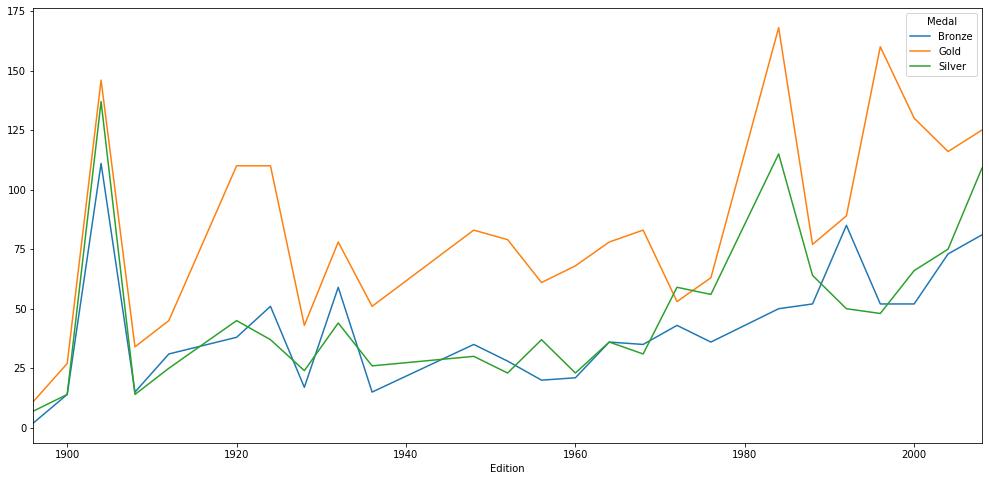

In [59]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot(figsize=(17, 8));

Great work! It's difficult to gain too much insight from this visualization, however. An area plot, which you'll construct in the next exercise, may be more helpful.



## 11. Visualizing USA Medal Counts by Edition: Area Plot
As in the previous exercise, your job in this exercise is to visualize the medal counts by `'Edition'` for the USA. This time, you will use an area plot to see the breakdown better. 

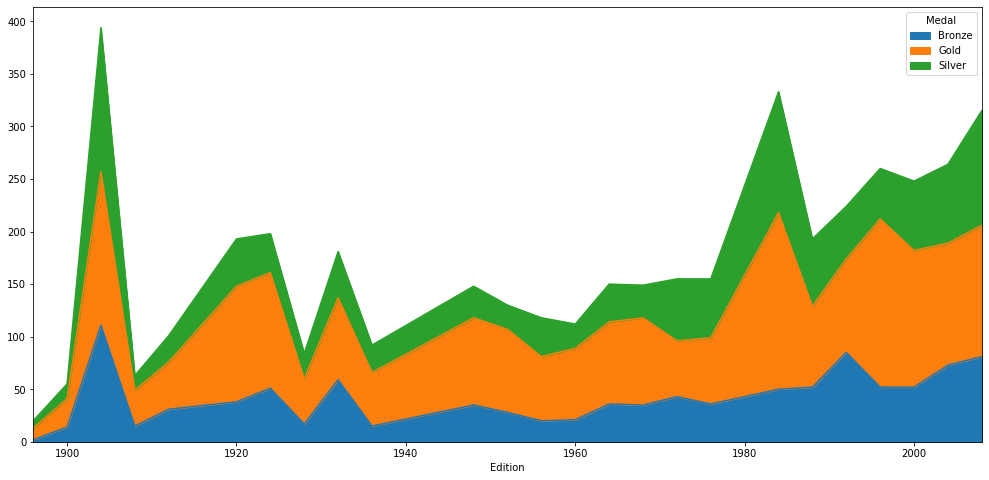

In [63]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(17, 8));

Excellent work! This plot is easier to make sense of.



## 12. Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals
You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: `Bronze < Gold < Silver`. However, you would prefer an ordering consistent with the Olympic rules: `Bronze < Silver < Gold`.

You can achieve this using `Categorical` types. In this final exercise, after redefining the `'Medal'` column of the DataFrame `medals`, you will repeat the area plot from the previous exercise to see the new ordering.

In [72]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal, categories=["Bronze", "Silver", "Gold"], ordered=True)

# Print tail of medals.Medal
medals.Medal.tail()

29211    Silver
29212    Bronze
29213    Bronze
29214      Gold
29215    Silver
Name: Medal, dtype: category
Categories (3, object): [Bronze < Silver < Gold]

In [69]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1896 to 2008
Data columns (total 3 columns):
Bronze    25 non-null int64
Silver    25 non-null int64
Gold      25 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


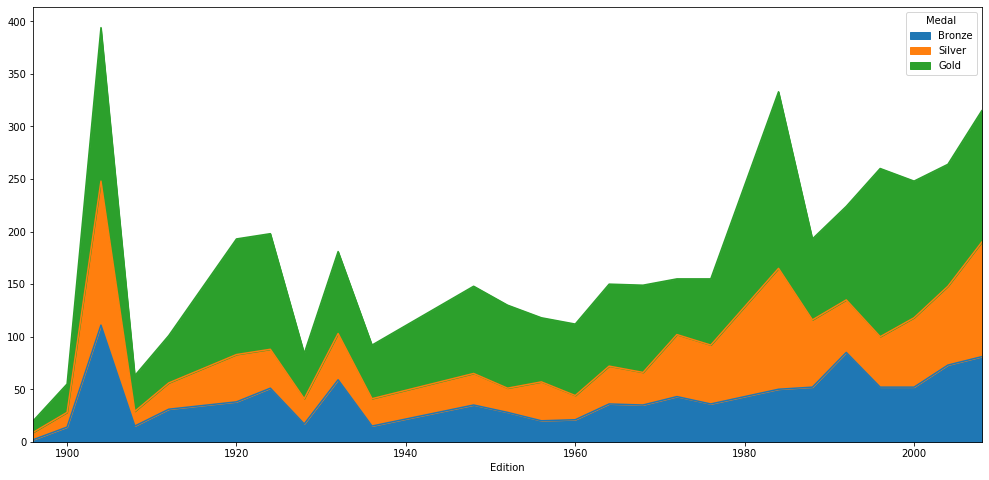

In [70]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(17, 8));

Congratulations! 

Don't forget to download the [Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8)